# Graduate Rotational Internship Program: The Sparks Foundation
# Parv Arora
# Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
# Unsupervised Machine Learning : K-Means Clustering 

Importing relevant libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('iris.csv')

In [21]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [24]:
X= df.iloc[:,1:5].values

In [25]:
from sklearn.cluster import KMeans

In [26]:
wcss= []
for i in range(1,11):
    km= KMeans(n_clusters= i)
    km.fit(X)
    wcss.append(km.inertia_)

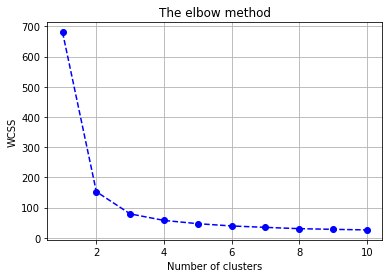

In [34]:
# Plotting the elbow method graph
plt.plot(range(1, 11), wcss, 'go--', color='blue')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# From the above Eblow Curve we can observe that 3 clusters will be the optimum number of clusters


In [28]:
# Applying kmeans to the dataset 
kmn = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_predicted = kmn.fit_predict(X)

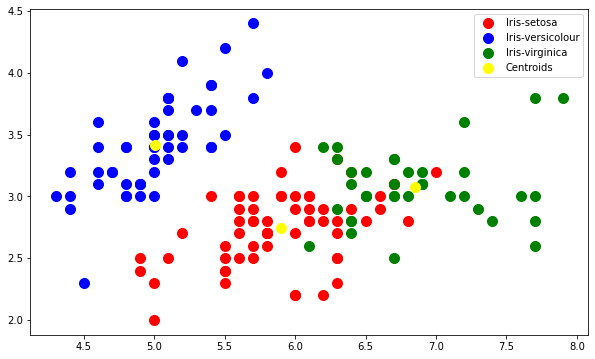

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_predicted == 0, 0], X[y_predicted == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_predicted == 1, 0], X[y_predicted == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_predicted == 2, 0], X[y_predicted == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmn.cluster_centers_[:, 0], kmn.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

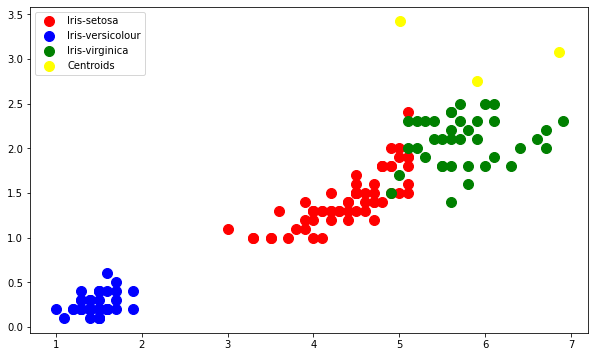

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_predicted == 0, 2], X[y_predicted == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_predicted == 1, 2], X[y_predicted == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_predicted == 2, 2], X[y_predicted == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmn.cluster_centers_[:, 0], kmn.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()